# Problem 1
You know that each BankAccount object has attributes id, balance and rate. Use builder pattern
and any extra classes and methods that you may need to realize the creation of a BankAccount type
object. Create some objects and do some operations to test your classes.

In [17]:
from abc import ABC, abstractmethod
import random
import string

class BankAccountBuilder(ABC):
    
    @abstractmethod
    def create_account(self):
        pass
    

class IDBankAccountBuilder(BankAccountBuilder):
    
    def create_account(self, name, surname):
        account_id = self.get_account_id() # get id which is not used by someone else
        self.account = BankAccount(name, surname, account_id)
        print(f'IDBank account for client {name} {surname} successfully created!')
         
    def get_account_id(self):
        return ''.join(random.choice(string.digits) for i in range(10))
        
    def add_card(self, currency):
        self.account.add_card(currency, cashback = 1) # different cashback in different banks

    def add_deposit(self, amount, currency):
        self.account.add_deposit(amount, currency, rate = 8) # different rate in different banks
    

class BankAccount():

    def __init__(self, name, surname, account_id):
        self.name = name
        self.surname = surname
        self.account_id = account_id

    def add_card(self, currency, cashback):
        print(f'card with {currency} currency successfully activated!')

    def add_deposit(self, amount, currency, rate):
        print(f'{amount} {currency} deposite successfully opened!')


builder = IDBankAccountBuilder()
builder.create_account('Arto', 'Maranjyan')
builder.add_card('USD')
builder.add_deposit(5000, 'USD')
print('account_id: ', builder.account.account_id)

IDBank account for client Arto Maranjyan successfully created!
card with USD currency successfully activated!
5000 USD deposite successfully opened!
account_id:  9294768044


# Problem 2
Use prototype design pattern and classes of your choice. create an abstract class Shape and
concrete classes extending the Shape class: Circle, Square and Rectangle. Define a class
ShapeCache which stores shape objects in a dictionary and returns their clones when
requested. Create some objects and do some operations to test your classes.

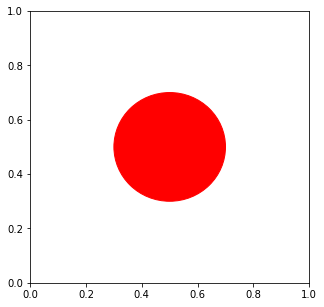

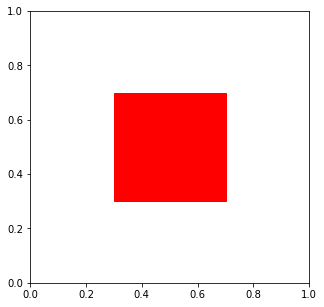

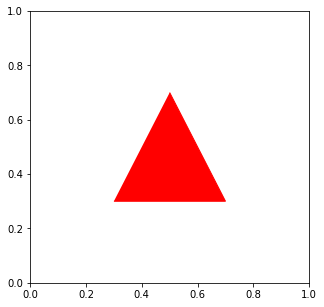

In [20]:
import copy
import numpy as np
import matplotlib.pyplot as plt  
from abc import ABCMeta, abstractmethod  
  
class Shape(metaclass = ABCMeta):

    @abstractmethod
    def draw(self):
        pass
    
    def get_id(self):
        return self.id
  
    def set_id(self, sid):
        self.id = sid    
    
    def clone(self):
        return copy.copy(self)
    
class Circle(Shape):
    
    def draw(self):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.add_patch(plt.Circle((0.5, 0.5), 0.2, color='red'))

class Square(Shape):
    
    def draw(self):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.add_patch(plt.Rectangle((0.3, 0.3), 0.4, 0.4, color = 'red'))
        
class Triangle(Shape):
    
    def draw(self):
        fig, ax = plt.subplots(figsize=(5,5))
        pts = np.array([[0.3,0.3], [0.7,0.3], [0.5,0.7]])
        ax.add_patch(plt.Polygon(pts, closed=False, color = 'red'))
  

class ShapeCache:
    cache = {}
  
    @staticmethod
    def get_shape(sid):
        SHAPE = ShapeCache.cache.get(sid, None)

        return SHAPE.clone() 
  
    @staticmethod
    def load():
        circle = Circle()
        circle.set_id("1")
        ShapeCache.cache[circle.get_id()] = circle
  
        square = Square()
        square.set_id("2")
        ShapeCache.cache[square.get_id()] = square
    
        triangle = Triangle()
        triangle.set_id("3")
        ShapeCache.cache[triangle.get_id()] = triangle
  
ShapeCache.load()

circle = ShapeCache.get_shape("1")
circle.draw()

square = ShapeCache.get_shape("2")
square.draw()

triangle = ShapeCache.get_shape("3")
triangle.draw()